# Datos del Estudiante.

1. Nombre: Luis Felipe Narváez Gómez 
2. Código: 2312660
3. Universidad Santo Tomas seccional Tunja
4. Facultad: Ingeniería de Sistemas
5. Asignatura: Electiva I - Deep Learning
6. Periodo: 2021-2

# NAIVE BAYES o REDES BAYESIANAS

# DataFrame Diavetes

## Ejercicio de Clasificacion de Diabeticos

### Importar Librerias

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from  sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sb
#guardar las graficas directamente en el libro
%matplotlib inline

### Importar base de datos desde Github

Link de Github:

https://github.com/OnRuiso/Deep-Learning-/blob/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/naive_bayes_diabetes.csv

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/naive_bayes_diabetes.csv

Ahora importemos

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/naive_bayes_diabetes.csv')
df.head(5)

,glucosa,presion_sanguinea,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


### Informacion de la base de datos

In [3]:
""" Da la informacion general de los datos presentados en "df_psico" """
df.describe()

,glucosa,presion_sanguinea,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [4]:
"""df.isnull().sum() = nos dice si hay datos nulos y va sumando cuantos encuentra en cada columna"""
df.isnull().sum()

glucosa              0
presion_sanguinea    0
diabetes             0
dtype: int64

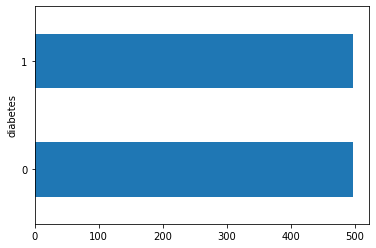

In [5]:
"""
grafica los datos presentados en "df_psico" contra el tamaño de de la columna 'categoria'  y lo imprime en un grafico (plot) de barras (barth)
"""
df.groupby('diabetes').size().plot.barh()

In [6]:
"""
df.info() : Devuelve información (número de filas, número de columnas, índices, tipo de las columnas y memoria usado) sobre el DataFrame df.
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   glucosa            995 non-null    int64
 1   presion_sanguinea  995 non-null    int64
 2   diabetes           995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [7]:
"""df.shape : Devuelve una tupla con el número de filas y columnas del DataFrame df."""
df.shape

(995, 3)

In [8]:
"""df.size : Devuelve el número de elementos del DataFrame."""
df.size

2985

In [9]:
"""df.columns : Devuelve una lista con los nombres de las columnas del DataFrame df."""
df.columns

Index(['glucosa', 'presion_sanguinea', 'diabetes'], dtype='object')

In [10]:
"""df.index : Devuelve una lista con los nombres de las filas del DataFrame df."""
df.index

RangeIndex(start=0, stop=995, step=1)

In [11]:
"""df.dtypes : Devuelve una serie con los tipos de datos de las columnas del DataFrame df."""
df.dtypes

glucosa              int64
presion_sanguinea    int64
diabetes             int64
dtype: object

In [12]:
"""df.count() : Devuelve una serie número de elementos que no son nulos ni NaN en cada columna del DataFrame df."""
df.count()

glucosa              995
presion_sanguinea    995
diabetes             995
dtype: int64

In [13]:
"""df.sum() : Devuelve una serie con la suma de los datos de las columnas del 
DataFrame df cuando los datos son de un tipo numérico, o la concatenación de 
ellos cuando son del tipo cadena str."""
df.sum()

glucosa              44085
presion_sanguinea    78789
diabetes               498
dtype: int64

In [14]:
"""df.min() : Devuelve una serie con los menores de los datos de las columnas del DataFrame df."""
df.min()

glucosa              20
presion_sanguinea    50
diabetes              0
dtype: int64

In [15]:
"""df.max() : Devuelve una serie con los mayores de los datos de las columnas del DataFrame df."""
df.max()

glucosa               70
presion_sanguinea    100
diabetes               1
dtype: int64

In [16]:
"""df.mean() : Devuelve una serie con las media de los datos de las columnas del DataFrame df cuando los datos son de un tipo numérico."""
df.mean()

glucosa              44.306533
presion_sanguinea    79.184925
diabetes              0.500503
dtype: float64

In [17]:
"""df.std() : Devuelve una serie con las desviaciones típicas de los datos de las columnas 
del DataFrame df cuando los datos son de un tipo numérico."""
df.std()

glucosa              6.707567
presion_sanguinea    9.340204
diabetes             0.500251
dtype: float64

In [18]:
"""df.describe(include = tipo) : Devuelve un DataFrame con un resumen estadístico de las columnas del 
DataFrame df del tipo tipo. Para los datos numéricos (number) se calcula la media, la desviación típica, 
el mínimo, el máximo y los cuartiles de las columnas numéricas. Para los datos no numéricos (object) 
se calcula el número de valores, el número de valores distintos, la moda y su frecuencia. Si no se indica 
el tipo solo se consideran las columnas numéricas."""
df.describe(include = int)

,glucosa,presion_sanguinea,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [19]:
"""s.value_counts() : Devuelve una serie con la frecuencia (número de repeticiones) de cada valor de la serie s."""
df.value_counts()

glucosa  presion_sanguinea  diabetes
45       88                 0           33
         85                 0           33
         87                 0           31
         90                 0           30
40       87                 0           28
                                        ..
45       85                 1            1
         87                 1            1
         98                 0            1
50       52                 1            1
20       70                 1            1
Length: 175, dtype: int64

In [20]:
"""df.tail(n) : Devuelve las n últimas filas del DataFrame df."""
df.tail(3)

,glucosa,presion_sanguinea,diabetes
992,40,83,0
993,40,60,1
994,45,82,0


In [21]:
"""df.head(n) : Devuelve las n primeras filas del DataFrame df."""
df.head(3)

,glucosa,presion_sanguinea,diabetes
0,40,85,0
1,40,92,0
2,45,63,1


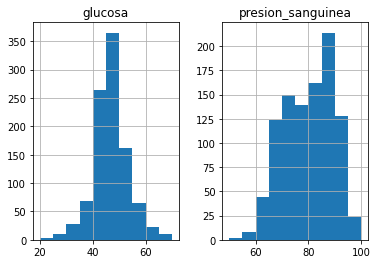

In [22]:
#Dispersión de los mismos datos
"""Graficara todos los datos de forma de histograma (hist), menos el que corresponde lo que se haya escrito"""
df.drop(['diabetes'],1).hist()
plt.show()

In [23]:
"""print(df.keys()) : Imprime los keys o titulos de las columnas, funciona como columns"""
print(df.keys())

Index(['glucosa', 'presion_sanguinea', 'diabetes'], dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


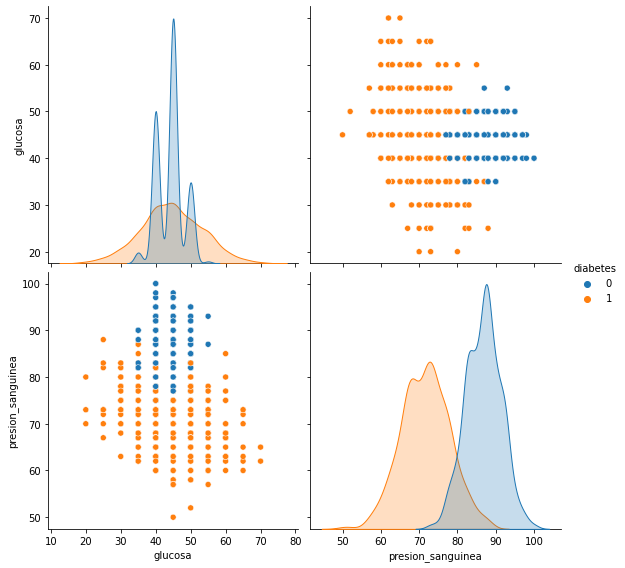

In [24]:
"""
graficos de relaciones en pares en el dataset.

hue = variación de colores dependiendo del valor de la variable
Hara un grafico de correlaciones
"""
sb.pairplot(df, hue='diabetes',size=4,vars=['glucosa', 'presion_sanguinea'],kind='scatter')

## Manejo de Datos 

### Separacion de Datos

In [25]:
X= df.drop('diabetes',axis=1) # toma todos los datos de las columnas menos los correspondientes a "diabetes" para ser los datos de "X"
Y= df['diabetes'] #tomara del DataFrame los datos correspondientes a la columna "diabetes"

## Entrenamiento

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3, random_state=42)

### Intanciamiento de algoritmo y entrenamiento

In [27]:
naba = GaussianNB();
naba.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Prediccion

In [28]:
Y_pred = naba.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(' Accuracy Naive Bayes : '+ str(accuracy*100))

 Accuracy Naive Bayes : 93.31103678929766
